# Import modules

In [1]:
%matplotlib inline
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np

# Import Labeled Data set

In [2]:
widths = (8,7,4,13,43)
header_pd = pd.read_fwf('Labeled_data.txt', widths = widths,skiprows=7, nrows=27)
labeled_data = pd.read_csv('Labeled_data.txt', header=None, delim_whitespace=True, skiprows=37) # extract data
labeled_data.columns = header_pd.iloc[:,3]
label = labeled_data.Type.unique()

In [3]:
labeled_data.head()

-------------,ID,SourceID,RAdeg,DEdeg,Per,R21,phi21,T0,gmag,rmag,...,phi21_r,R2_g,R2_r,Amp_g,Amp_r,log(FAP_g),log(FAP_r),Type,Dmin_g,Dmin_r
0,ZTFJ000000.14+721413.7,2,0.00061,72.23716,0.299150,0.263,6.308,58388.255579,19.613,18.804,...,6.308,0.624,0.873,0.540,0.438,-13.490,-27.331,EW,0.190,0.078
1,ZTFJ000000.19+320847.2,3,0.00080,32.14645,0.287059,0.010,8.024,58280.478081,15.311,14.610,...,8.024,0.940,0.977,0.219,0.197,-7.506,-10.079,EW,0.020,0.017
2,ZTFJ000000.26+311206.3,4,0.00109,31.20176,0.362217,0.132,6.281,58283.461994,16.350,15.844,...,6.281,0.951,0.960,0.233,0.226,-7.830,-9.245,EW,0.013,0.020
3,ZTFJ000000.30+711634.1,5,0.00125,71.27616,0.268515,0.160,5.236,58657.423517,19.144,17.875,...,5.236,0.363,0.623,0.173,0.154,-9.865,-22.037,EW,0.000,0.005
4,ZTFJ000000.30+233400.5,6,0.00125,23.56682,0.269874,0.193,6.302,58437.268664,17.890,16.944,...,6.302,0.910,0.976,0.373,0.352,-7.075,-8.819,EW,0.098,0.034


# Split into training and test data

In [4]:
from sklearn import preprocessing
from sklearn.model_selection import train_test_split

# Map string labels to numbers
le = preprocessing.LabelEncoder()
le.fit(label)

# Drop columns that are not features
X = labeled_data.drop(['Type','ID','SourceID', 'RAdeg','DEdeg'],axis='columns')
# Encode labels to form y labels
y = le.transform(labeled_data.Type)

# Split dataset into training set and test set
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3) # 70% training and 30% test

# Train a simple Random Forest estimator

In [5]:
#Import Random Forest Model
from sklearn.ensemble import RandomForestClassifier
from sklearn import metrics

#Create a Gaussian Classifier
clf=RandomForestClassifier(n_estimators=100)

#Train the model using the training sets y_pred=clf.predict(X_test)
clf.fit(X_train,y_train)

# Predict test data output
y_pred=clf.predict(X_test)

# Estimate model accuracy
print("Accuracy:",metrics.accuracy_score(y_test, y_pred))

Accuracy: 0.9355939287191712


# Visualize Feature importance

In [6]:
# feature importance
feature_imp = pd.Series(clf.feature_importances_,index=X.columns).sort_values(ascending=False)
feature_imp

-------------
Dmin_r        0.160408
Per           0.136470
Per_r         0.126535
Dmin_g        0.103965
R21           0.060927
Per_g         0.057392
Amp_r         0.051201
R21_r         0.049830
Amp_g         0.040010
phi21_r       0.029277
R2_g          0.025612
R2_r          0.023288
R21_g         0.021823
phi21         0.019534
phi21_g       0.016055
rmag          0.015162
Num_g         0.013667
gmag          0.012041
log(FAP_r)    0.010516
log(FAP_g)    0.010181
Num_r         0.008952
T0            0.007153
dtype: float64

No handles with labels found to put in legend.


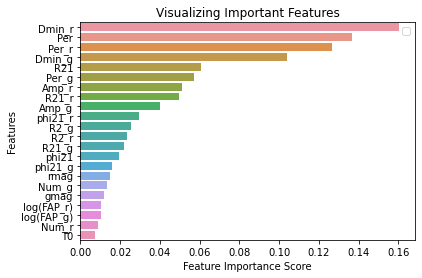

In [7]:
import seaborn as sns

# Creating a bar plot
sns.barplot(x=feature_imp, y=feature_imp.index)
# Add labels to your graph
plt.xlabel('Feature Importance Score')
plt.ylabel('Features')
plt.title("Visualizing Important Features")
plt.legend()
plt.show()

# Plot location of test data

In [ ]:
# import astropy.coordinates as coord
# import astropy.units as u

# ra = coord.Angle(labeled_data.RAdeg[1:700000:7000], unit=u.degree)

# ra = ra.wrap_at(180*u.degree)
# dec = coord.Angle(labeled_data.DEdeg[1:700000:7000], unit=u.degree)

# fig = plt.figure(figsize=(8,6))
# ax = fig.add_subplot(111, projection="mollweide")
# ax.scatter(ra.radian, dec.radian)